## Keras -- MLPs on MNIST

In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [104]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

<h2> 5. MLP + Relu+ AdamOptimizer </h2>

In [106]:
model_relu = Sequential()

model_relu.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.041, seed=None)))
model_relu.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.079, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_45 (Dense)             (None, 52)                18980     
_________________________________________________________________
dense_46 (Dense)             (None, 10)                530       
Total params: 305,250
Trainable params: 305,250
Non-trainable params: 0
_________________________________________________________________


In [107]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.2704 - acc: 0.9235 - val_loss: 0.1234 - val_acc: 0.9632
Epoch 2/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1026 - acc: 0.9691 - val_loss: 0.0898 - val_acc: 0.9732
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0664 - acc: 0.9799 - val_loss: 0.0737 - val_acc: 0.9752
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0467 - acc: 0.9855 - val_loss: 0.0952 - val_acc: 0.9682
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0348 - acc: 0.9892 - val_loss: 0.0726 - val_acc: 0.9781
Epoch 6/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0264 - acc: 0.9918 - val_loss: 0.0642 - val_acc: 0.9803
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0217 - acc: 0.9932 - val_loss: 0.0770 - val_acc

Test score: 0.0938286443330142
Test accuracy: 0.9816


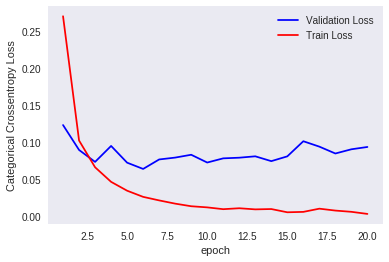

In [108]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5. MLP + Relu+BatchNormalization+ AdamOptimizer </h2>

In [109]:
model_relu_batchnormal = Sequential()

model_relu_batchnormal.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.041, seed=None)))
model_relu_batchnormal.add(BatchNormalization())

model_relu_batchnormal.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.079, seed=None)) )
model_relu_batchnormal.add(BatchNormalization())

model_relu_batchnormal.add(Dense(output_dim, activation='softmax'))
model_relu_batchnormal.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_19 (Batc (None, 364)               1456      
_________________________________________________________________
dense_48 (Dense)             (None, 52)                18980     
_________________________________________________________________
batch_normalization_20 (Batc (None, 52)                208       
_________________________________________________________________
dense_49 (Dense)             (None, 10)                530       
Total params: 306,914
Trainable params: 306,082
Non-trainable params: 832
_________________________________________________________________


In [110]:
model_relu_batchnormal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu_batchnormal.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.2221 - acc: 0.9368 - val_loss: 0.1156 - val_acc: 0.9650
Epoch 2/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0833 - acc: 0.9752 - val_loss: 0.0960 - val_acc: 0.9709
Epoch 3/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0523 - acc: 0.9843 - val_loss: 0.0743 - val_acc: 0.9777
Epoch 4/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0402 - acc: 0.9874 - val_loss: 0.0704 - val_acc: 0.9799
Epoch 5/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0289 - acc: 0.9913 - val_loss: 0.0784 - val_acc: 0.9766
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0244 - acc: 0.9924 - val_loss: 0.0678 - val_acc: 0.9798
Epoch 7/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0200 - acc: 0.9938 - val_loss: 0.0854 - 

Test score: 0.07634242584260718
Test accuracy: 0.9806


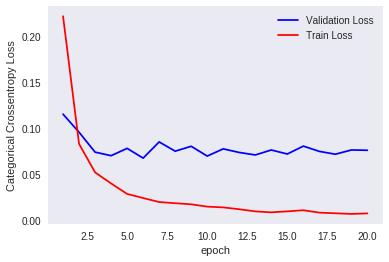

In [111]:
score = model_relu_batchnormal.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5. MLP + Relu+BatchNormalization+Dropout + AdamOptimizer </h2>

In [112]:
model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.041, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.079, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))
model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_21 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_17 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 52)                18980     
_________________________________________________________________
batch_normalization_22 (Batc (None, 52)                208       
_________________________________________________________________
dropout_18 (Dropout)         (None, 52)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 10)                530       
Total para

In [113]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.5365 - acc: 0.8394 - val_loss: 0.1804 - val_acc: 0.9435
Epoch 2/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.2565 - acc: 0.9272 - val_loss: 0.1231 - val_acc: 0.9640
Epoch 3/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.2029 - acc: 0.9414 - val_loss: 0.1000 - val_acc: 0.9694
Epoch 4/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1691 - acc: 0.9510 - val_loss: 0.0924 - val_acc: 0.9734
Epoch 5/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.1521 - acc: 0.9557 - val_loss: 0.0819 - val_acc: 0.9755
Epoch 6/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1397 - acc: 0.9593 - val_loss: 0.0816 - val_acc: 0.9760
Epoch 7/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1288 - acc: 0.9628 - val_loss: 0.0749 - 

Test score: 0.05998181880775373
Test accuracy: 0.984


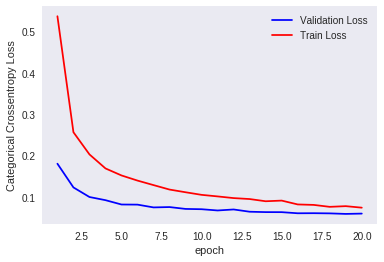

In [114]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5. MLP with 3 Layes+ Relu+AdamOptimizer </h2>

In [115]:
model_relu_3layers = Sequential()

model_relu_3layers.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.041, seed=None)))

model_relu_3layers.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.079, seed=None)) )

model_relu_3layers.add(Dense(25, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.161, seed=None)) )

model_relu_3layers.add(Dense(output_dim, activation='softmax'))

model_relu_3layers.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_54 (Dense)             (None, 52)                18980     
_________________________________________________________________
dense_55 (Dense)             (None, 25)                1325      
_________________________________________________________________
dense_56 (Dense)             (None, 10)                260       
Total params: 306,305
Trainable params: 306,305
Non-trainable params: 0
_________________________________________________________________


In [116]:
model_relu_3layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_3layers.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.2935 - acc: 0.9149 - val_loss: 0.1368 - val_acc: 0.9585
Epoch 2/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1116 - acc: 0.9672 - val_loss: 0.1082 - val_acc: 0.9684
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0729 - acc: 0.9781 - val_loss: 0.0906 - val_acc: 0.9718
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0534 - acc: 0.9836 - val_loss: 0.0782 - val_acc: 0.9754
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0388 - acc: 0.9880 - val_loss: 0.0730 - val_acc: 0.9796
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0290 - acc: 0.9907 - val_loss: 0.0743 - val_acc: 0.9783
Epoch 7/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0251 - acc: 0.9921 - val_loss: 0.0755 - val_ac

Test score: 0.09865239412761967
Test accuracy: 0.9801


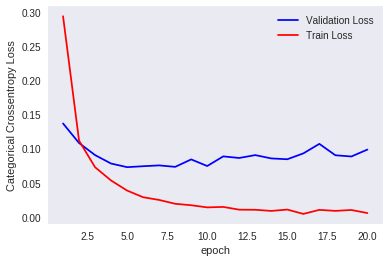

In [117]:
score = model_relu_3layers.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5. MLP with 3layers+ Relu+BatchNormalization+Dropout + AdamOptimizer </h2>

In [118]:
model_3layers = Sequential()

model_3layers.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.041, seed=None)))
model_3layers.add(BatchNormalization())
model_3layers.add(Dropout(0.5))

model_3layers.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.079, seed=None)) )
model_3layers.add(BatchNormalization())
model_3layers.add(Dropout(0.5))

model_3layers.add(Dense(25, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.161, seed=None)) )
model_3layers.add(BatchNormalization())
model_3layers.add(Dropout(0.5))



model_3layers.add(Dense(output_dim, activation='softmax'))


model_3layers.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_23 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_19 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 52)                18980     
_________________________________________________________________
batch_normalization_24 (Batc (None, 52)                208       
_________________________________________________________________
dropout_20 (Dropout)         (None, 52)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 25)                1325      
__________

In [119]:
model_3layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3layers.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 185us/step - loss: 1.0643 - acc: 0.6694 - val_loss: 0.2346 - val_acc: 0.9336
Epoch 2/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.4785 - acc: 0.8690 - val_loss: 0.1582 - val_acc: 0.9528
Epoch 3/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.3547 - acc: 0.9057 - val_loss: 0.1294 - val_acc: 0.9620
Epoch 4/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.2950 - acc: 0.9236 - val_loss: 0.1180 - val_acc: 0.9659
Epoch 5/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.2654 - acc: 0.9325 - val_loss: 0.1070 - val_acc: 0.9702
Epoch 6/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.2436 - acc: 0.9381 - val_loss: 0.1031 - val_acc: 0.9704
Epoch 7/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.2182 - acc: 0.9441 - val_loss: 0.1004 -

Test score: 0.07759342590162414
Test accuracy: 0.9797


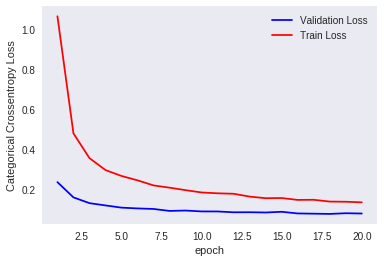

In [120]:
score = model_3layers.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5. MLP with 5layers+ Relu+ AdamOptimizer </h2>

In [121]:
model_relu_5layers = Sequential()

model_relu_5layers.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.041, seed=None)))
model_relu_5layers.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.079, seed=None)) )

model_relu_5layers.add(Dense(25, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.161, seed=None)) )

model_relu_5layers.add(Dense(10, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.239, seed=None)) )

model_relu_5layers.add(Dense(output_dim, activation='softmax'))


model_relu_5layers.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_62 (Dense)             (None, 52)                18980     
_________________________________________________________________
dense_63 (Dense)             (None, 25)                1325      
_________________________________________________________________
dense_64 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_65 (Dense)             (None, 10)                110       
Total params: 306,415
Trainable params: 306,415
Non-trainable params: 0
_________________________________________________________________


In [122]:
model_relu_5layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_5layers.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.4157 - acc: 0.8767 - val_loss: 0.1925 - val_acc: 0.9444
Epoch 2/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.1240 - acc: 0.9651 - val_loss: 0.1089 - val_acc: 0.9672
Epoch 3/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0799 - acc: 0.9763 - val_loss: 0.0925 - val_acc: 0.9722
Epoch 4/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0577 - acc: 0.9821 - val_loss: 0.0819 - val_acc: 0.9754
Epoch 5/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0414 - acc: 0.9869 - val_loss: 0.0802 - val_acc: 0.9762
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0340 - acc: 0.9892 - val_loss: 0.0952 - val_acc: 0.9743
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0260 - acc: 0.9914 - val_loss: 0.0807 - val_ac

Test score: 0.1163331188787612
Test accuracy: 0.978


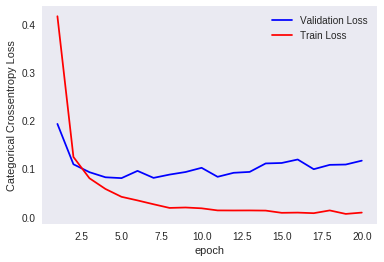

In [123]:
score = model_relu_5layers.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5. MLP with 5layers+ Relu+BatchNormalization+Dropout + AdamOptimizer </h2>

In [124]:
model_5layers = Sequential()

model_5layers.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.041, seed=None)))
model_5layers.add(BatchNormalization())
model_5layers.add(Dropout(0.5))

model_5layers.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.079, seed=None)) )
model_5layers.add(BatchNormalization())
model_5layers.add(Dropout(0.5))

model_5layers.add(Dense(25, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.161, seed=None)) )
model_5layers.add(BatchNormalization())
model_5layers.add(Dropout(0.5))

model_5layers.add(Dense(10, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.239, seed=None)) )
model_5layers.add(BatchNormalization())
model_5layers.add(Dropout(0.5))



model_5layers.add(Dense(output_dim, activation='softmax'))


model_5layers.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_26 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_22 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 52)                18980     
_________________________________________________________________
batch_normalization_27 (Batc (None, 52)                208       
_________________________________________________________________
dropout_23 (Dropout)         (None, 52)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 25)                1325      
__________

In [125]:
model_5layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_5layers.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 223us/step - loss: 1.8694 - acc: 0.3464 - val_loss: 0.8703 - val_acc: 0.8628
Epoch 2/20
60000/60000 [==============================] - 10s 164us/step - loss: 1.2428 - acc: 0.5621 - val_loss: 0.4589 - val_acc: 0.9123
Epoch 3/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.9855 - acc: 0.6517 - val_loss: 0.3281 - val_acc: 0.9378
Epoch 4/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.8581 - acc: 0.6966 - val_loss: 0.2480 - val_acc: 0.9485
Epoch 5/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.7780 - acc: 0.7252 - val_loss: 0.2022 - val_acc: 0.9587
Epoch 6/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.7209 - acc: 0.7453 - val_loss: 0.1867 - val_acc: 0.9575
Epoch 7/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.6778 - acc: 0.7599 - val_loss: 0.

Test score: 0.11967902074716985
Test accuracy: 0.9747


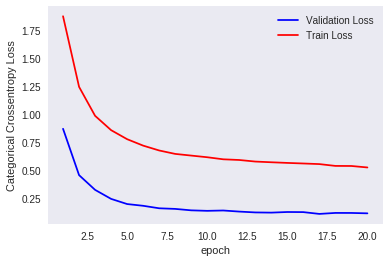

In [126]:
score = model_5layers.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1>Conclusion</h1>

In [131]:
from prettytable import PrettyTable
t = PrettyTable()
t.field_names = ['Model', 'Test_Accuracy']
t.add_row(['MLP with 784-364-128-10_Relu_Adam','0.981'])
t.add_row(['MLP with 784-364-128-10_Relu_Batch_dropout_Adam','0.984'])
t.add_row(['MLP with 784-364-52-25-10_Relu_Adam','0.980'])
t.add_row(['MLP with 784-364-52-25-10_Relu_Batch_dropout_Adam','0.979'])
t.add_row(['MLP with 784-364-52-25-10-10_Relu_Adam','0.978'])
t.add_row(['MLP with 784-364-52-25-10-10_Relu_Batch_dropout_Adam','0.974'])
print(t)

+------------------------------------------------------+---------------+
|                        Model                         | Test_Accuracy |
+------------------------------------------------------+---------------+
|          MLP with 784-364-128-10_Relu_Adam           |     0.981     |
|   MLP with 784-364-128-10_Relu_Batch_dropout_Adam    |     0.984     |
|         MLP with 784-364-52-25-10_Relu_Adam          |     0.980     |
|  MLP with 784-364-52-25-10_Relu_Batch_dropout_Adam   |     0.979     |
|        MLP with 784-364-52-25-10-10_Relu_Adam        |     0.978     |
| MLP with 784-364-52-25-10-10_Relu_Batch_dropout_Adam |     0.974     |
+------------------------------------------------------+---------------+
